In [ ]:
!pip install kaggle

# **Restaurant Recommendation System**

The model produced here can be used for a Restaurant Recommendation System that takes various inputs from the user such as the delivery distance, the opening and closing time of restaurant, etc. and outputs the rating of restaurant, allowing the user to make his or her decision for delivery based on that predicted rating about the Restaurant.

In [ ]:
from google.colab import files

# Upload the Kaggle API key file (kaggle.json) that you downloaded
uploaded = files.upload()


Saving kaggle.json to kaggle (2).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mrmorj/restaurant-recommendation-challenge

restaurant-recommendation-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip restaurant-recommendation-challenge.zip

Archive:  restaurant-recommendation-challenge.zip
replace SampleSubmission (1).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Descriptive Analysis**

The consolidated data is found in train_full.csv file. However, to filter out the useless data, we perform our analysis on three separate entities in separate files that are, vendors, orders, and customers

## Vendors

In [ ]:
import pandas as pd
df = pd.read_csv('vendors.csv')

Checking Variables with Unique Values

In [ ]:
for i in df.keys():
  if(df[i].nunique() == len(df)):
    print(i)

id
authentication_id
longitude
created_at


Checking constant attributes

In [ ]:
for i in df.keys():
  if(df[i].nunique() == 1):
    print(i)

commission
is_akeed_delivering
language
open_close_flags
one_click_vendor
country_id
city_id
display_orders


In [ ]:
df.keys()

Index(['id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status', 'verified', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday

From the observation of data, it is found that weekends have same open and close timings, while weekdays have same open and close timings

In [ ]:
#Vendor tag is just encoded form of vendor_tag_name
df.drop('vendor_tag',axis=1,inplace=True)

In [ ]:
df.drop(['OpeningTime','OpeningTime2'],axis=1,inplace=True) #Opening times can be known from week timings

In [ ]:
df.drop(['device_type','updated_at'],axis=1,inplace=True) #These variables are very unlikey to affect the overall result

In [ ]:
!pip install dask

Loading dask dataframe, which is a parallelized version of Pandas dataframe, since loading whole single Pandas dataframe would exceed the computational resources

In [ ]:
import dask.dataframe as dd
data = dd.read_csv('train_full.csv')

In [ ]:
data.columns

Index(['customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x',
       'updated_at_x', 'location_number', 'location_type', 'latitude_x',
       'longitude_x', 'id', 'authentication_id', 'latitude_y', 'longitude_y',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status_y', 'verified_y', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       

In [ ]:
vendor_columns_to_drop = ['tuesday_from_time1','tuesday_to_time1','tuesday_from_time2', 'tuesday_to_time2', 'wednesday_from_time1',
       'wednesday_to_time1', 'wednesday_from_time2', 'wednesday_to_time2',
       'thursday_from_time1', 'thursday_to_time1', 'thursday_from_time2',
       'thursday_to_time2', 'friday_from_time1', 'friday_to_time1',
       'friday_from_time2', 'friday_to_time2', 'saturday_from_time1',
       'saturday_to_time1', 'saturday_from_time2', 'saturday_to_time2','vendor_tag','OpeningTime','OpeningTime2','device_type','updated_at_x','id','authentication_id','longitude_x','created_at_x',
                          'commission','is_akeed_delivering','language','open_close_flags','one_click_vendor','country_id','city_id','display_orders']

In [ ]:
data = data.drop(vendor_columns_to_drop,axis=1)

# Customers

In [ ]:
customers = pd.read_csv('train_customers.csv')

In [ ]:
for i in customers.keys():
  print(f"Unique values of {i} are: {customers[i].nunique()}")

Unique values of akeed_customer_id are: 34523
Unique values of gender are: 10
Unique values of dob are: 65
Unique values of status are: 2
Unique values of verified are: 2
Unique values of language are: 1
Unique values of created_at are: 33650
Unique values of updated_at are: 29409


In [ ]:
#Created at and updated at are always unique almost, whereas status consists of more than 95% of the same value, therefore they can be dropped

In [ ]:
customers_to_drop = ['status_x','created_at_y','updated_at_y']

In [ ]:
data = data.drop(customers_to_drop,axis=1)

# Orders

In [ ]:
orders = pd.read_csv('orders.csv')

<ipython-input-22-df2dffd913ed>:1: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv('orders.csv')


In [ ]:
for i in orders.keys():
  print(f"Unique values of {i} are:{orders[i].nunique()}")

Unique values of akeed_order_id are:135221
Unique values of customer_id are:27445
Unique values of item_count are:35
Unique values of grand_total are:1048
Unique values of payment_mode are:5
Unique values of promo_code are:1396
Unique values of vendor_discount_amount are:78
Unique values of promo_code_discount_percentage are:4
Unique values of is_favorite are:2
Unique values of is_rated are:2
Unique values of vendor_rating are:6
Unique values of driver_rating are:6
Unique values of deliverydistance are:1513
Unique values of preparationtime are:14
Unique values of delivery_time are:4823
Unique values of order_accepted_time are:86308
Unique values of driver_accepted_time are:46458
Unique values of ready_for_pickup_time are:83592
Unique values of picked_up_time are:83622
Unique values of delivered_time are:85501
Unique values of delivery_date are:112
Unique values of vendor_id are:100
Unique values of created_at are:134213
Unique values of LOCATION_NUMBER are:24
Unique values of LOCATION_

In [ ]:
data = data.drop(['CID X LOC_NUM X VENDOR'],axis=1)

In [ ]:
data = data.rename(columns={'monday_from_time1':'weekday_open_time1','monday_from_time2':'weekday_open_time2',
                   'monday_to_time1':'weekday_close_time1','monday_to_time2':'weekday_close_time2',
                   'sunday_from_time1':'weekend_open_time1','sunday_from_time2':'weekend_open_time2',
                   'sunday_to_time1':'weekend_close_time1','sunday_to_time2':'weekend_close_time2'})
#From the observation of data, it is found that weekends have same open and close timings, while weekdays have same open and close timings

In [ ]:
#All the ids were just preserved so as to make them reference while merging the tables, but in the merged data, they play no role in analysis and prediction.Thus, they can be safely dropped
data = data.drop(['customer_id','id_obj','target'],axis=1)

In [ ]:
data = data.drop(['latitude_x','longitude_y','latitude_y'],axis=1)

In [ ]:
data = data.drop_duplicates()

In [ ]:
#We have now 20,900 rows left only after dropping the duplicates
len(data)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


20900

In [ ]:
sampled_data = data.sample(frac=0.2,random_state = 42)  #Sampling 20% of data

In [ ]:
pandas_data = sampled_data.compute()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


In [ ]:
del sampled_data, data

In [ ]:
for i in pandas_data.keys():
  print(f"Number of null values in {i}: {pandas_data[i].isnull().sum()}")

Number of null values in gender: 1528
Number of null values in verified_x: 0
Number of null values in location_number: 0
Number of null values in location_type: 1105
Number of null values in vendor_category_en: 0
Number of null values in vendor_category_id: 0
Number of null values in delivery_charge: 0
Number of null values in serving_distance: 0
Number of null values in is_open: 0
Number of null values in prepration_time: 0
Number of null values in discount_percentage: 0
Number of null values in status_y: 0
Number of null values in verified_y: 0
Number of null values in rank: 0
Number of null values in vendor_rating: 0
Number of null values in weekend_open_time1: 38
Number of null values in weekend_close_time1: 38
Number of null values in weekend_open_time2: 2409
Number of null values in weekend_close_time2: 2409
Number of null values in weekday_open_time1: 0
Number of null values in weekday_close_time1: 0
Number of null values in weekday_open_time2: 2409
Number of null values in week

In [ ]:
pandas_data['verified_y'].value_counts()
pandas_data['verified_x'].value_counts()
pandas_data['status_y'].value_counts()

1.0    3539
0.0     641
Name: status_y, dtype: int64

In [ ]:
#Dropping highly imbalanced columns
pandas_data.drop(['verified_x','verified_y','status_y'],axis=1,inplace=True)

In [ ]:
for i in pandas_data.keys():
  print(f"Missing values in {i} are:{pandas_data[i].isnull().sum()}")

Missing values in gender are:1528
Missing values in location_number are:0
Missing values in location_type are:1105
Missing values in vendor_category_en are:0
Missing values in vendor_category_id are:0
Missing values in delivery_charge are:0
Missing values in serving_distance are:0
Missing values in is_open are:0
Missing values in prepration_time are:0
Missing values in discount_percentage are:0
Missing values in rank are:0
Missing values in vendor_rating are:0
Missing values in weekend_open_time1 are:38
Missing values in weekend_close_time1 are:38
Missing values in weekend_open_time2 are:2409
Missing values in weekend_close_time2 are:2409
Missing values in weekday_open_time1 are:0
Missing values in weekday_close_time1 are:0
Missing values in weekday_open_time2 are:2409
Missing values in weekday_close_time2 are:2409
Missing values in primary_tags are:949
Missing values in vendor_tag_name are:130
Missing values in location_number_obj are:0


In [ ]:
pandas_data['gender'].fillna('Unknown',inplace=True)

In [ ]:
pandas_data.drop(['weekday_open_time2','weekday_close_time2','weekend_open_time2','weekend_close_time2'],axis=1,inplace=True)

In [ ]:
pandas_data['vendor_tag_name'].mode()

0    American,Breakfast,Burgers,Cafe,Desserts,Free ...
Name: vendor_tag_name, dtype: object

In [ ]:
pandas_data['vendor_tag_name'].fillna('American,Breakfast,Burgers,Cafe,Desserts,Free ...',inplace=True)

In [ ]:
pandas_data['weekend_open_time1'].mode()

0    00:01:00
Name: weekend_open_time1, dtype: object

In [ ]:
pandas_data['weekend_open_time1'].fillna('00:01:00',inplace=True)
pandas_data['weekend_close_time1'].mode()

0    23:45:00
Name: weekend_close_time1, dtype: object

In [ ]:
pandas_data['weekend_close_time1'].fillna('23:45:00',inplace=True)

In [ ]:
pandas_data['location_type'].fillna('Other',inplace=True)

In [ ]:
#Rank consists of binary values as 1 and 11. Replacing 11 with 1 and 1 with 0

pandas_data['rank'] = pandas_data['rank'].replace({1:0,11:1})

In [ ]:
pandas_data['primary_tags'].fillna('{"primary_tags":"0"}',inplace=True)

In [ ]:
#Convert primary tags into their integer values
def convertTag(x):
  a = x.split(":")[1]
  return int(a.split('"')[1])

pandas_data['primary_tags']=pandas_data['primary_tags'].apply(convertTag)

In [ ]:
pandas_data.select_dtypes(include=['object']).keys()

Index(['gender', 'location_type', 'vendor_category_en', 'weekend_open_time1',
       'weekend_close_time1', 'weekday_open_time1', 'weekday_close_time1',
       'vendor_tag_name'],
      dtype='object')

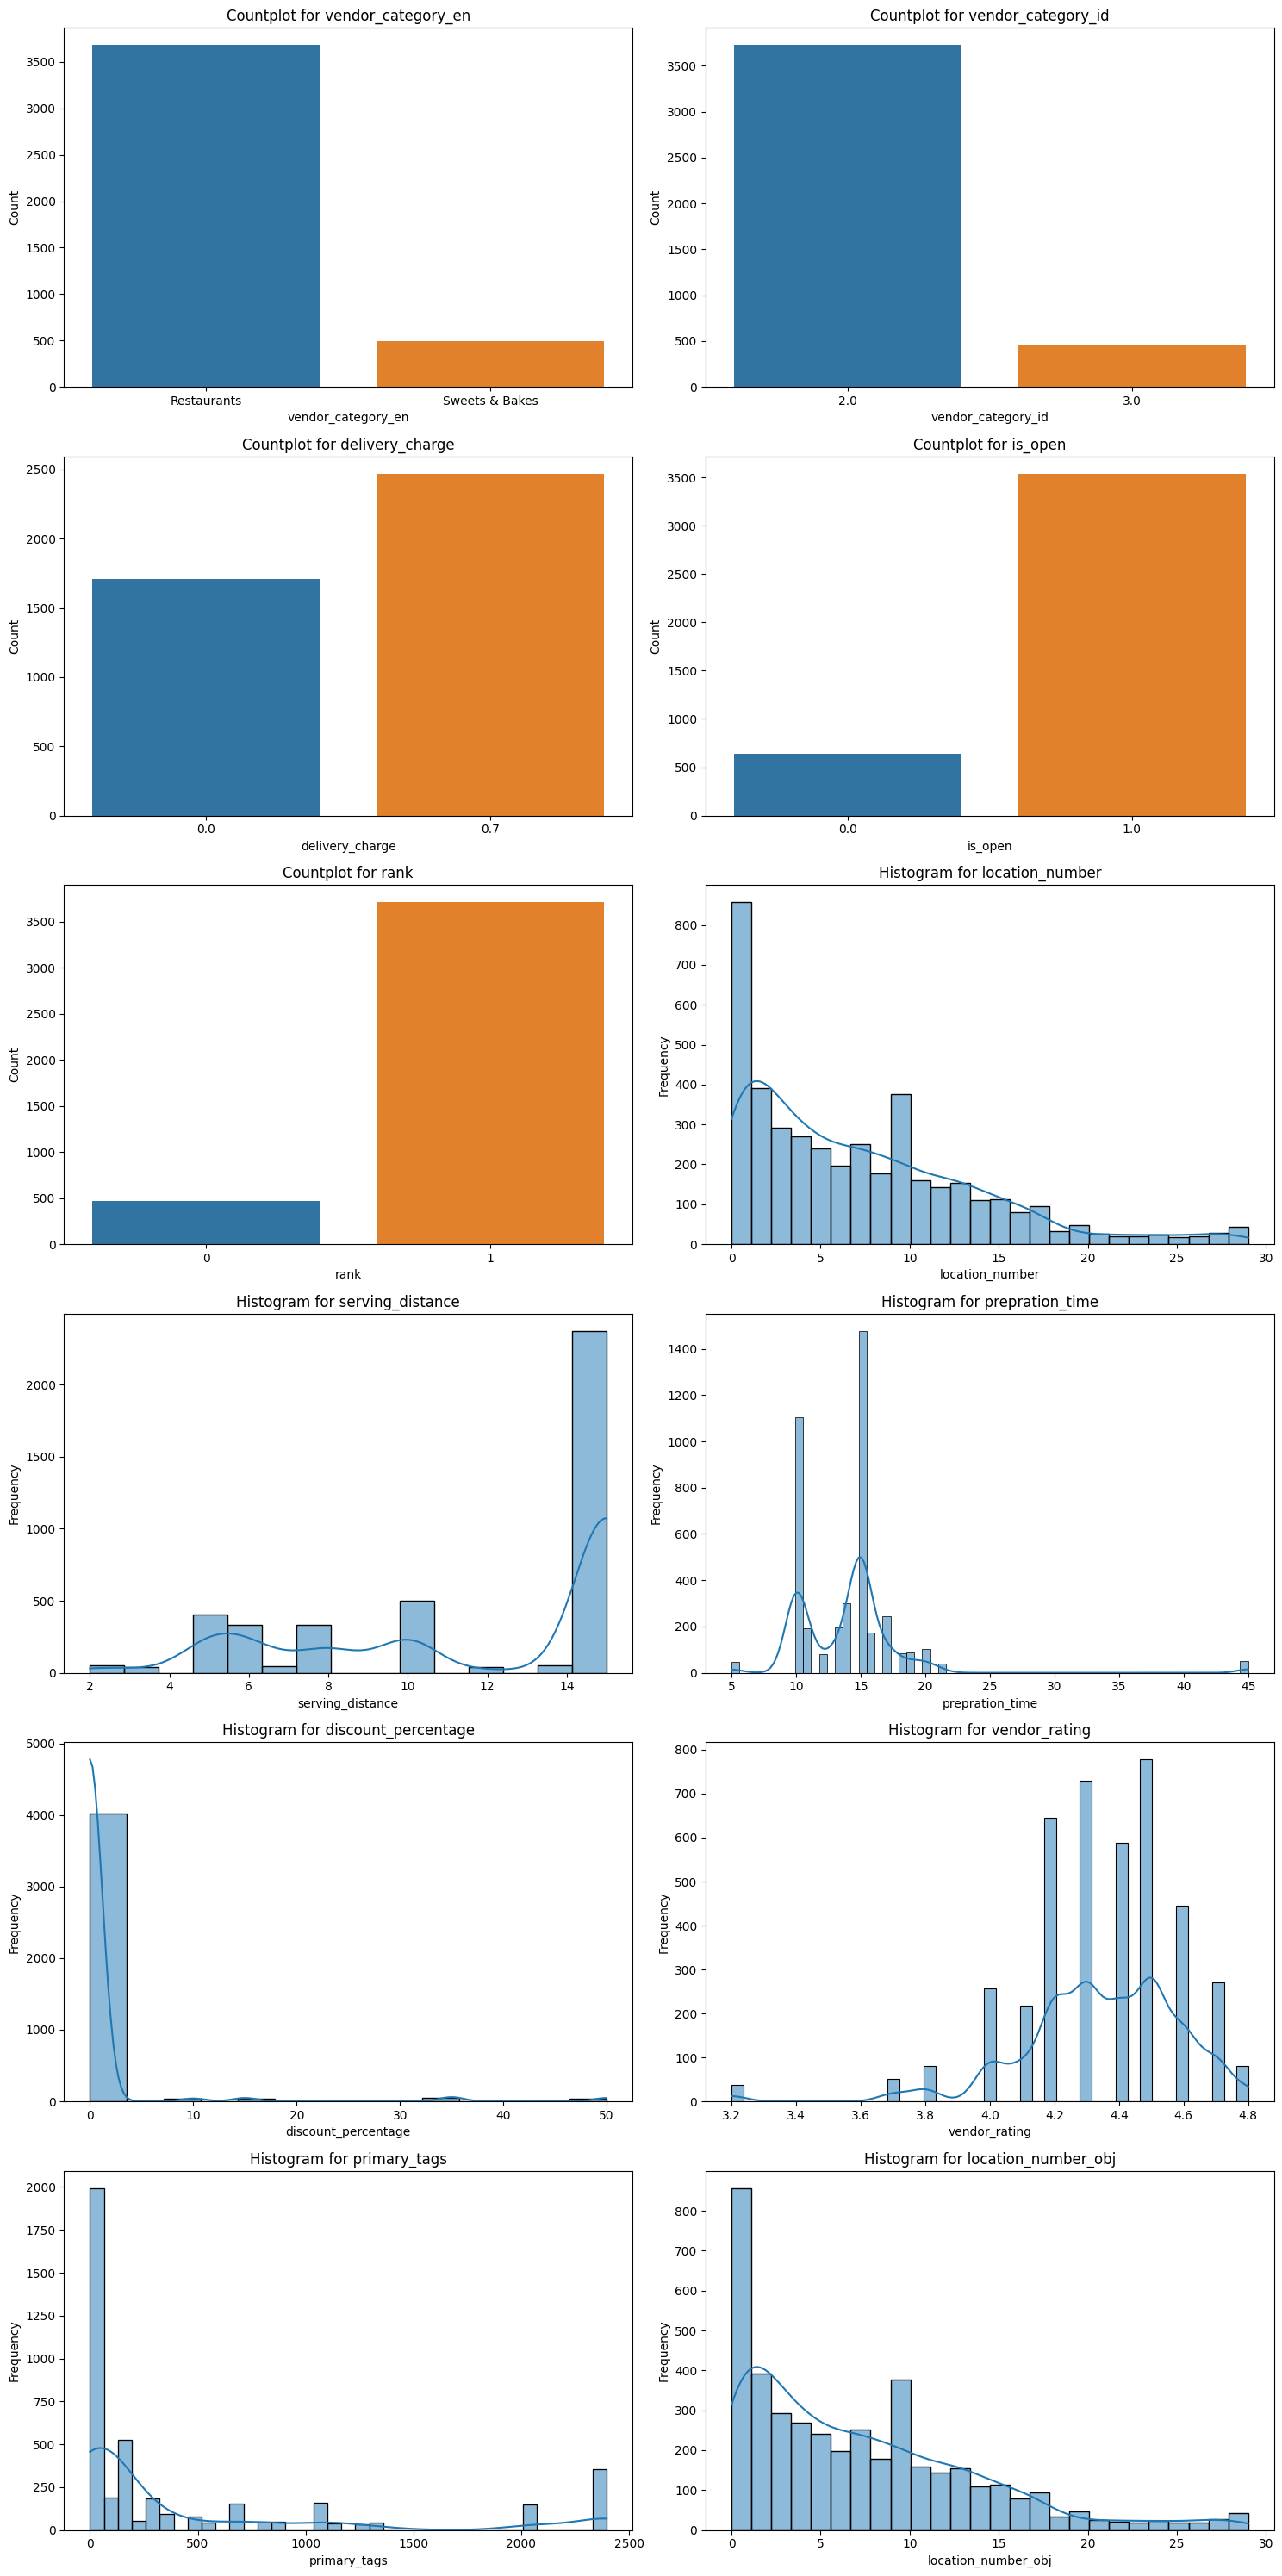

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically identify binary and numerical variables
binary_variables = []
numerical_variables = []

for column in pandas_data.columns:
    unique_values = pandas_data[column].nunique()
    if unique_values == 2:
        binary_variables.append(column)
    elif pd.api.types.is_numeric_dtype(pandas_data[column]):
        numerical_variables.append(column)

# Set the size of the plot based on the number of variables
num_plots = len(binary_variables) + len(numerical_variables)
num_cols = 2  # Number of columns in the plot grid (binary, numerical)
num_rows = (num_plots + 1) // num_cols  # Number of rows in the plot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array in case there's only one row
axes = axes.flatten()

# Plot countplots for binary variables
for i, variable in enumerate(binary_variables):
    sns.countplot(x=variable, data=pandas_data, ax=axes[i])
    axes[i].set_title(f'Countplot for {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')

# Plot histograms for numerical variables
for i, variable in enumerate(numerical_variables):
    sns.histplot(x=variable, data=pandas_data, ax=axes[len(binary_variables) + i], kde=True)
    axes[len(binary_variables) + i].set_title(f'Histogram for {variable}')
    axes[len(binary_variables) + i].set_xlabel(variable)
    axes[len(binary_variables) + i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [ ]:
num_var = pandas_data.select_dtypes(exclude=['object']).keys()

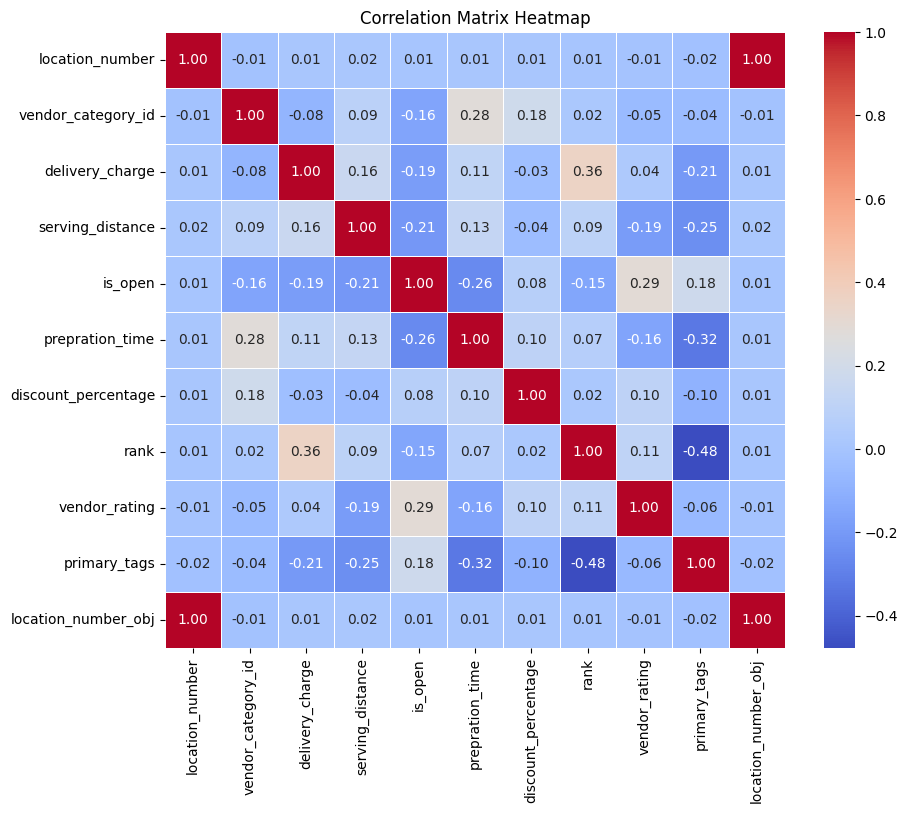

In [ ]:
corr_matrix = pandas_data[num_var].corr(method='pearson')
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

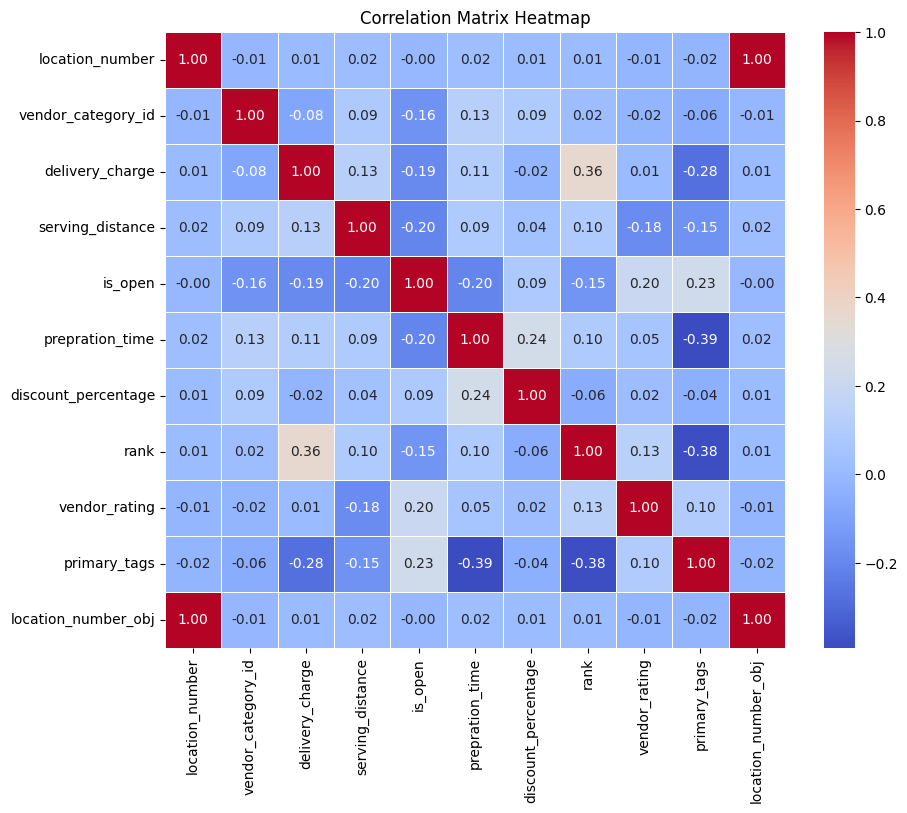

In [ ]:
corr_matrix = pandas_data[num_var].corr(method='spearman')
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [ ]:
#Location number and location_number_obj are exact same variables. Both do not have linear or non-linear correlation with vendor ratings.
pandas_data.drop(['location_number','location_number_obj'],axis=1,inplace=True)

In [ ]:
pandas_data

,location_type,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,rank,weekend_open_time1,weekend_close_time1,weekday_open_time1,weekday_close_time1,primary_tags
60658,Other,2.0,0.0,8.0,1.0,19,0.0,0,08:00:00,22:45:00,08:00:00,22:45:00,71
60561,Other,2.0,0.7,15.0,1.0,15,0.0,1,11:00:00,15:30:00,11:00:00,15:30:00,297
24391,Home,2.0,0.7,8.0,1.0,14,0.0,1,11:59:00,22:45:00,11:59:00,22:45:00,695
906,Other,2.0,0.7,15.0,1.0,15,0.0,1,00:01:00,00:30:00,00:01:00,00:30:00,8
17979,Home,3.0,0.0,15.0,1.0,13,0.0,1,08:30:00,23:45:00,08:30:00,23:45:00,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77561,Work,2.0,0.7,6.0,1.0,17,0.0,1,08:00:00,23:59:00,08:00:00,23:59:00,51
7455,Home,3.0,0.7,10.0,1.0,15,0.0,1,00:01:00,23:45:00,09:00:00,21:00:00,0
14836,Other,2.0,0.7,15.0,1.0,14,0.0,1,10:00:00,23:45:00,10:00:00,23:45:00,24
56268,Other,2.0,0.7,15.0,1.0,15,0.0,1,10:00:00,23:45:00,10:00:00,23:45:00,1065


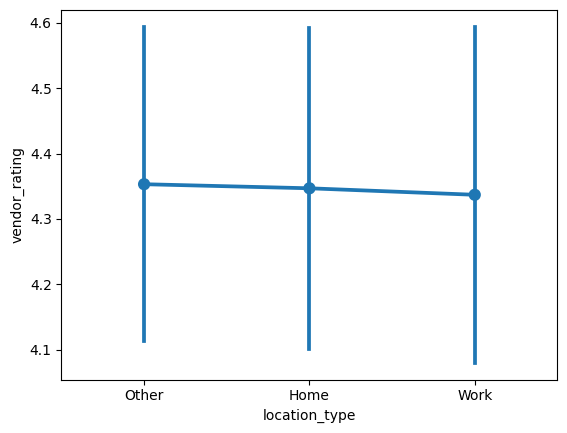

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pointplot(x='location_type', y='vendor_rating', data=pandas_data, errorbar='sd')
plt.show()


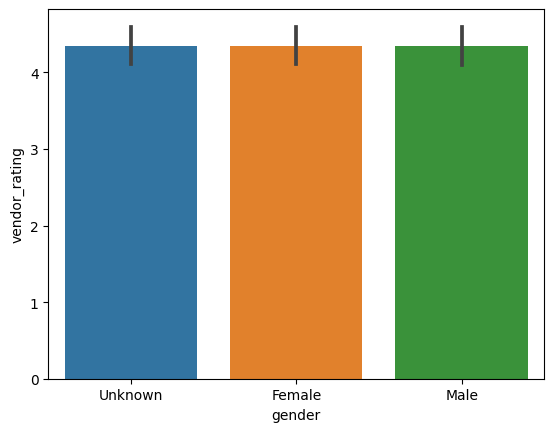

In [ ]:
sns.barplot(x='gender', y='vendor_rating', data=pandas_data,errorbar='sd')
plt.show()

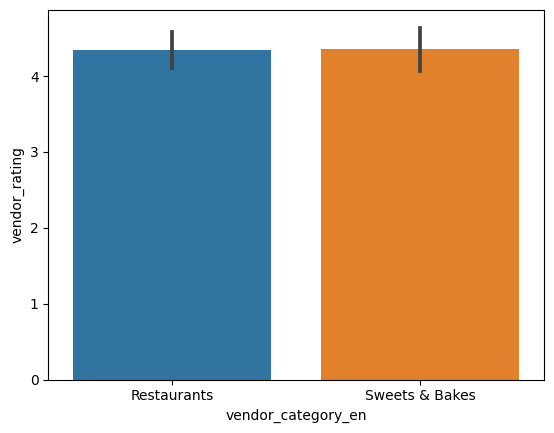

In [ ]:
sns.barplot(x='vendor_category_en', y='vendor_rating', data=pandas_data,errorbar='sd')
plt.show()

In [ ]:
pandas_data.drop('vendor_tag_name',axis=1,inplace=True)

In [ ]:
y = pandas_data['vendor_rating']
x = pandas_data.drop('vendor_rating',axis=1,inplace=True)

In [ ]:
x.drop('location_type',axis=1,inplace=True)

**Findings and Actions:**
Final dataset consisted of:
-1528 Null values in gender which were imputed with 'Uknown'
-1105 Null values for location type which were imputed with 'Other'
-38 Null values for weekend open time 1 and weekend close time 1 which were imputed with the mode values
-949 Null values primary tags which were imputed with 0 to make no effect
-130 Null Values in vendor tag name which were imputed with mode. This feature was later dropped, though, since it contained 77 unique values which could lead to a high dimensional data

The final dataset prepared contained 20,900 rows out of which 20% (4180) were sampled.
There are 17 features out of which Vendor Rating is a target feature
Numerical Variables:
- Discount Percentage
- Primary Tags
- Vendor Rating
- Location Number
- Preparation time
- Serving distance

Binary Variables:
- Is Open
- Rank
- Delivery Charge
- Vedor Category En
- Vendor Category ID

Categorical:
- Gender
- Weekday Open Time 1
- Weekday Close time 1
- Weekend Open Time 1
- Weekend Close Time 1
- Location Type

8 Features are of object type while the others including target variable are float64

Both Pearson and Spearman correlation coefficients are inspected, to inspect the correlation between numerical and target variable
Due to negligible correlation between location number and vendor rating, location number is dropped.
The inspection of correlation between categorical variables(Location Type, Gender, and Vendor Category En) and Vendor Rating(Numeric) through pointplot and bar plot show that the variance of ratings for all categories is nearly same. Hence, we drop these three variables.


# **Predictive Analysis**
Vendor Rating (Target Variable) is a numeric variable, therefore, it is a regression task. For that purpose, the following regression algorithms have been applied:

Ridge Regression
Random Forest Regressor
Support Vector Regressor
KNeighbors Regressor
Adaboost Regressor
XGB Regressor
Gradient Boosting Regressor
Stack Random Fores, XGB, and Gradient Boost Regressor
---



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error #Importing relevant libraries

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor #Importing ML models to be applied

In [ ]:
x.head()

,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,rank,weekend_open_time1,weekend_close_time1,weekday_open_time1,weekday_close_time1,primary_tags
60658,2.0,0.0,8.0,1.0,19,0.0,0,08:00:00,22:45:00,08:00:00,22:45:00,71
60561,2.0,0.7,15.0,1.0,15,0.0,1,11:00:00,15:30:00,11:00:00,15:30:00,297
24391,2.0,0.7,8.0,1.0,14,0.0,1,11:59:00,22:45:00,11:59:00,22:45:00,695
906,2.0,0.7,15.0,1.0,15,0.0,1,00:01:00,00:30:00,00:01:00,00:30:00,8
17979,3.0,0.0,15.0,1.0,13,0.0,1,08:30:00,23:45:00,08:30:00,23:45:00,336


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough') #Encoding categorical variables in one hot encoding fashion while dropping sparse rows or columns

step2 = Ridge(alpha=10) #Applying Ridge Regression model

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])  #Putting steps 1 and 2 into ML pipeline

pipe.fit(X_train,y_train) #Fitting the train set into the model

y_pred = pipe.predict(X_test) #Predicting on the test set

print('R2 score',r2_score(y_test,y_pred)) #Checking accuracy of the model. This should be maximum. Cannot be greater than 1
print('MAE',mean_absolute_error(y_test,y_pred)) #Checking mean absolute error. This should be minimum

#Same steps are to be followed for the rest of the models below.

R2 score 0.48064605476248523
MAE 0.10853909936796502


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9926483181544795
MAE 0.0072813692074886


In [ ]:
test_data = dd.read_csv('test_full.csv',assume_missing=True,dtype={'location_type':'object'})

In [ ]:
test_data.columns

Index(['customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x',
       'updated_at_x', 'location_number', 'location_type', 'latitude_x',
       'longitude_x', 'id', 'authentication_id', 'latitude_y', 'longitude_y',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status_y', 'verified_y', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       

In [ ]:
test_data = test_data.drop(customers_to_drop,axis=1)

In [ ]:
test_data = test_data.drop(vendor_columns_to_drop,axis=1)

In [ ]:
test_data = test_data.drop(['CID X LOC_NUM X VENDOR'],axis=1)

In [ ]:
x.head()

,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,rank,weekend_open_time1,weekend_close_time1,weekday_open_time1,weekday_close_time1,primary_tags
60658,2.0,0.0,8.0,1.0,19,0.0,0,08:00:00,22:45:00,08:00:00,22:45:00,71
60561,2.0,0.7,15.0,1.0,15,0.0,1,11:00:00,15:30:00,11:00:00,15:30:00,297
24391,2.0,0.7,8.0,1.0,14,0.0,1,11:59:00,22:45:00,11:59:00,22:45:00,695
906,2.0,0.7,15.0,1.0,15,0.0,1,00:01:00,00:30:00,00:01:00,00:30:00,8
17979,3.0,0.0,15.0,1.0,13,0.0,1,08:30:00,23:45:00,08:30:00,23:45:00,336


In [ ]:
test_data = test_data.drop(['customer_id','verified_x','latitude_x','latitude_y','longitude_y','location_number','location_number_obj',
                'status_y','verified_y','id_obj','vendor_tag_name','gender','vendor_category_en','location_type'],axis=1)

In [ ]:
test_data = test_data.rename(columns={'monday_from_time1':'weekday_open_time1','monday_from_time2':'weekday_open_time2',
                   'monday_to_time1':'weekday_close_time1','monday_to_time2':'weekday_close_time2',
                   'sunday_from_time1':'weekend_open_time1','sunday_from_time2':'weekend_open_time2',
                   'sunday_to_time1':'weekend_close_time1','sunday_to_time2':'weekend_close_time2'})

In [ ]:
test_data = test_data.drop(['weekend_open_time2', 'weekend_close_time2','weekday_open_time2',
       'weekday_close_time2'],axis=1)

In [ ]:
test_data['rank'] = test_data['rank'].replace({11:1,1:0})

In [ ]:
test_data = test_data.drop_duplicates()

In [ ]:
test_data = test_data.dropna()

In [ ]:
test_data = test_data.compute()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (0,1,4,5,14,19,20,23,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,60,61,62,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


In [ ]:
test_data['primary_tags']

0        4
1        7
2       71
3       46
4       32
      ... 
95    2396
96    2396
97    2396
98    2396
99      24
Name: primary_tags, Length: 77, dtype: int64

In [ ]:
y_test = test_data['vendor_rating']
x_test = test_data.drop('vendor_rating',axis=1)

In [ ]:
x.head()

,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,rank,weekend_open_time1,weekend_close_time1,weekday_open_time1,weekday_close_time1,primary_tags
60658,2.0,0.0,8.0,1.0,19,0.0,0,08:00:00,22:45:00,08:00:00,22:45:00,71
60561,2.0,0.7,15.0,1.0,15,0.0,1,11:00:00,15:30:00,11:00:00,15:30:00,297
24391,2.0,0.7,8.0,1.0,14,0.0,1,11:59:00,22:45:00,11:59:00,22:45:00,695
906,2.0,0.7,15.0,1.0,15,0.0,1,00:01:00,00:30:00,00:01:00,00:30:00,8
17979,3.0,0.0,15.0,1.0,13,0.0,1,08:30:00,23:45:00,08:30:00,23:45:00,336


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.982786770895618
MAE 0.010783225189188473


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7990270136905326
MAE 0.08776022804577295


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9838110135566993
MAE 0.005194805194805194


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9787195740717483
MAE 0.015635306425363774


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9848723304439233
MAE 0.006865249980579725


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.4248822107867596
MAE 0.12974259556020434


In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[7,8,9,10])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9453006135650579
MAE 0.03854970044847313


# **Conclusion/Summary**
The results of each model, trained on a test set of 1189 samples are:
Gradient Boost:

R2 score 0.9787195740717483

MAE 0.015635306425363774

XGB:

R2 score 0.9848723304439233

MAE 0.006865249980579725

AdaBoost:

R2 score 0.4248822107867596

MAE 0.12974259556020434

Stacking:

R2 score 0.9453006135650579

MAE 0.03854970044847313

Based on the results, considering both the R2 score as well as Mean Absolute Error, we can conclude that KNeighbors Regressor is the best performing algorithm in our case, and should be the model of choice.





# **Observation and Learning Points**

1. Careful observation and analysis of data is essential for Feature Engineering, ultimately improving the performance of the model.

2. The distinguishing of features as binary from numerical variables is important before checking for the linear correlation among numerical variables.

# **Strength of Analysis**

The data is a big data chosen for this system, and all of it couldn't be used for the training and thus, needed to be sampled. However, using Dask library for parallel computing of big data, the dataset was able to load and be inspected before sampling out of it. Dropping of duplicates, unimportant features, and other irrelevant rows reduced the data size from 5800000 to only 20,900 out of which 4180 rows were sampled. This made us able to sample from the most important data instead of a huge redundant data, ultimately making us able to produce a model with high accuracy.

# **Weakness of Analysis**

Although the model is performing quite well, yet it is only able to produce the vendor ratings around the numeric values that are there in the dataset. For example, if any vendor is to be rated between 3-3.5, a range not present anywhere in our training set, it is uncertain if the model will really output anywhere around that range. A solution to this is to gather a more diverse dataset, consisting of all the scenarios

